In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import time
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn import metrics
from sklearn.metrics import auc, f1_score, plot_roc_curve, precision_score, recall_score

In [2]:
df = pd.read_csv("Prognostic_Data.csv")
df.head()

,ID number,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor size,Lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [3]:
df.drop(columns=['ID number'], inplace = True)
df.dtypes

Outcome                     object
Time                         int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
df.isnull().sum()

Outcome                    0
Time                       0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Tumor size                 0
Lymph node status          0
dtype: int64

In [5]:
df["Lymph node status"].value_counts()

0     87
1     35
2     17
4     10
13     6
7      6
3      4
9      4
?      4
6      3
11     3
15     3
10     2
20     2
27     2
5      2
8      2
16     1
14     1
24     1
17     1
18     1
21     1
Name: Lymph node status, dtype: int64

In [6]:
df["Lymph node status"].replace({"?": np.nan}, inplace = True)
df.dropna(inplace = True)
df.isnull().sum()

Outcome                    0
Time                       0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Tumor size                 0
Lymph node status          0
dtype: int64

In [7]:
int_values = [int(i) for i in list(df['Lymph node status'])]
df['Lymph node status'] = int_values
df.dtypes

Outcome                     object
Time                         int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
df.describe()

,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor size,Lymph node status
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,46.938144,17.402320,22.300979,114.781495,969.092268,0.102774,0.142642,0.156309,0.086808,0.192885,...,140.136907,1401.756701,0.143921,0.364567,0.436010,0.178449,0.322251,0.090777,2.867526,3.211340
std,34.523646,3.171672,4.335292,21.430694,353.159959,0.012607,0.050229,0.070942,0.033962,0.027679,...,28.826843,587.040705,0.022092,0.165528,0.174757,0.045529,0.074068,0.021371,1.950588,5.479276
min,1.000000,10.950000,10.380000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,14.250000,15.052500,19.342500,98.160000,702.525000,0.093900,0.109850,0.106075,0.063760,0.174075,...,117.925000,940.575000,0.129325,0.247550,0.322150,0.152225,0.275950,0.076368,1.500000,0.000000
50%,39.500000,17.290000,21.795000,113.700000,929.100000,0.102200,0.131750,0.152050,0.086075,0.189350,...,136.500000,1295.000000,0.141750,0.350450,0.401150,0.178500,0.310300,0.086540,2.500000,1.000000
75%,73.000000,19.580000,24.782500,129.650000,1193.500000,0.111375,0.172200,0.200500,0.103925,0.209550,...,159.875000,1694.250000,0.154450,0.423675,0.550175,0.207125,0.358475,0.101775,3.500000,4.000000
max,125.000000,27.220000,39.280000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


In [9]:
df['Outcome'].value_counts()

N    148
R     46
Name: Outcome, dtype: int64

In [10]:
df['Outcome'].replace({'N':0, 'R':1}, inplace=True)

In [11]:
df

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Tumor size,Lymph node status
0,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,3,14.72,25.26,99.28,657.5,0.11740,0.21120,0.17290,0.09465,...,111.60,814.8,0.14640,0.5352,0.5655,0.19740,0.3778,0.11320,1.7,21
193,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0


In [12]:
df.columns

Index(['Outcome', 'Time', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Tumor size',
       'Lymph node status'],
      dtype='object')

In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(sampling_strategy="minority")

X = df.iloc[:, 1:34]
Y = df.iloc[:, 0]

X_oversampled, Y_oversampled = over_sampler.fit_resample(X, Y)
counter = 0
o_df = pd.DataFrame()
for i in list(df.columns)[1:35]:
    o_df[i] = X_oversampled[i]
    counter += 1
    
o_df["Outcome"] = Y_oversampled
df = o_df.copy()
Counter(Y_oversampled)

Counter({0: 148, 1: 148})

In [14]:
# pip install imblearn

In [15]:
# pip install --user imblearn

In [16]:
# columns

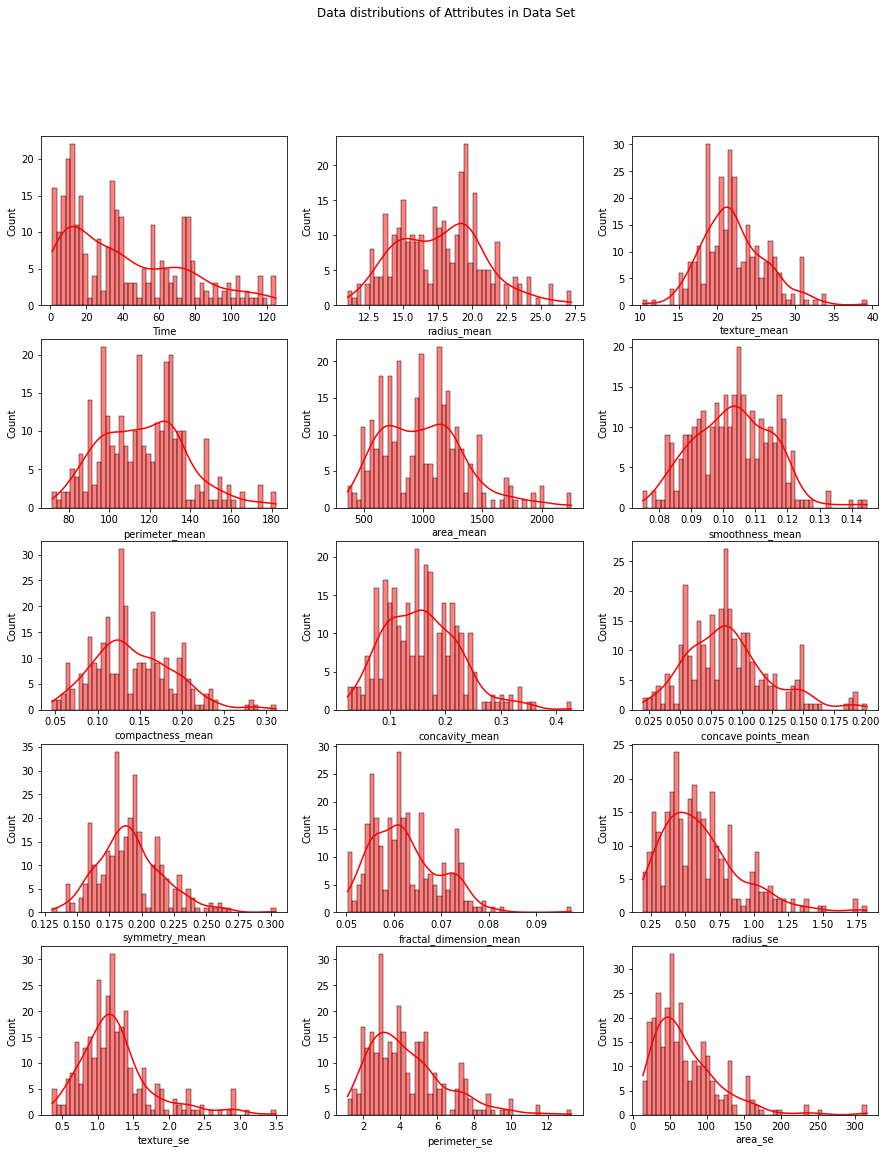

In [17]:
columns = list(df.columns)

def data_distribution(columns, bins = 50):
    fig = plt.figure(figsize=(15, 18))
    plt.suptitle("Data distributions of Attributes in Data Set")
    counter = 1
    for i in columns:
        plt.subplot(5,3, counter)
        sns.histplot(df[i], bins = bins, kde = True, color ='red')
        counter += 1

data_distribution(columns[0:15], bins = 50) 

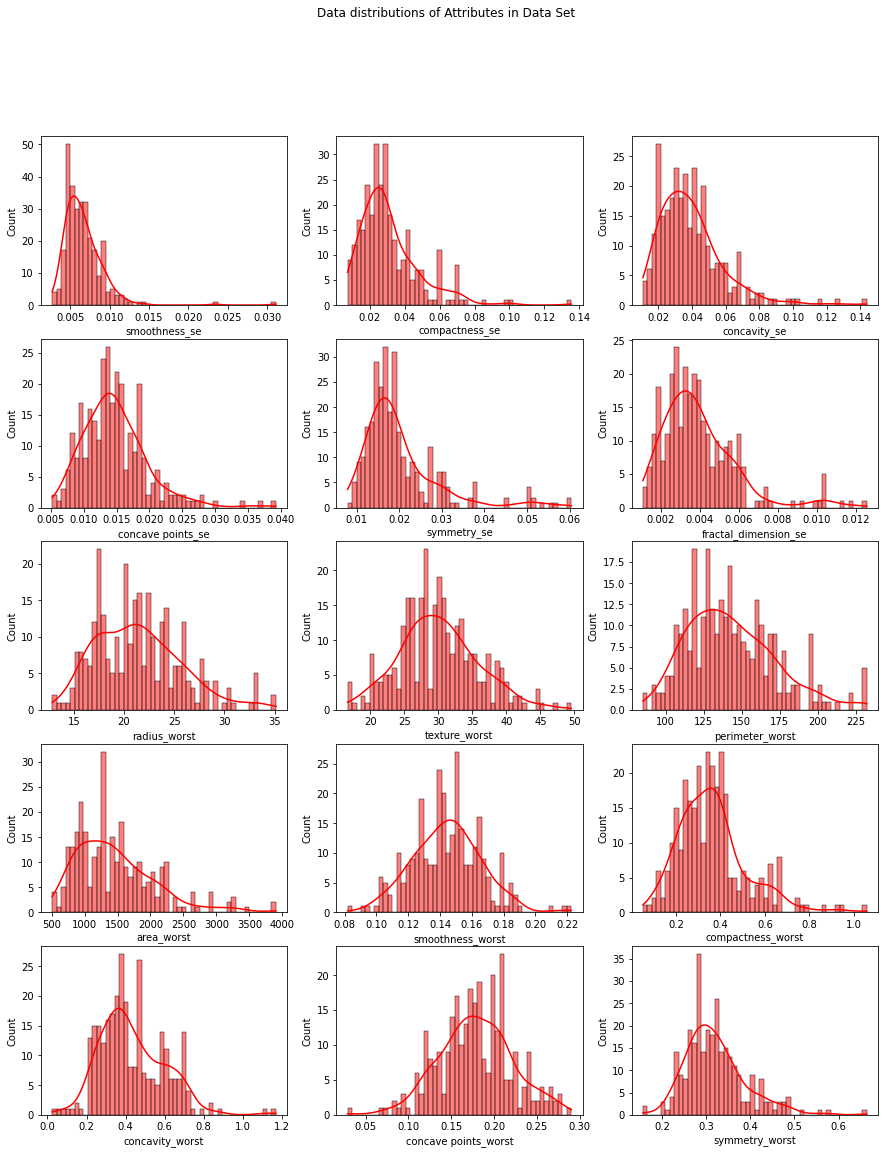

In [18]:
data_distribution(columns[15:30], bins = 50)       

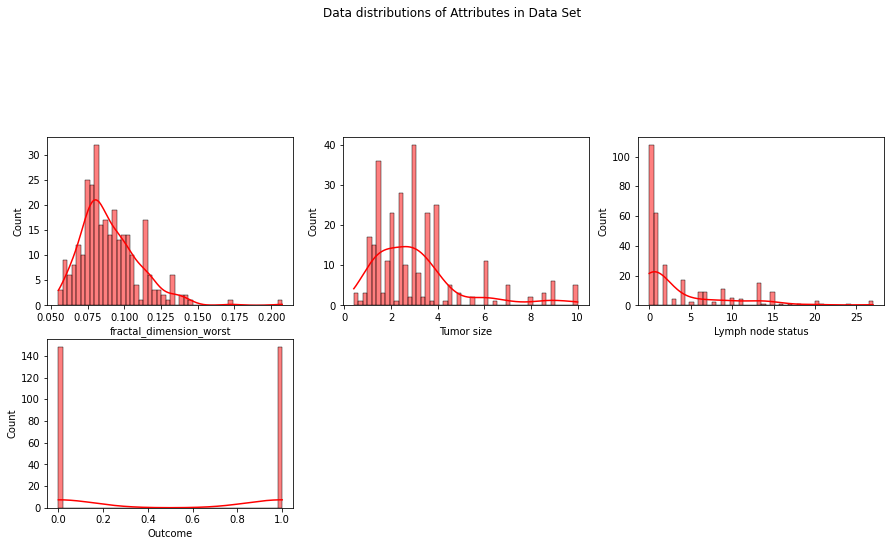

In [19]:
data_distribution(columns[30:], bins = 50) 

In [20]:
df.columns

Index(['Time', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Tumor size',
       'Lymph node status', 'Outcome'],
      dtype='object')

In [21]:
len(columns)

34

In [22]:
columns

['Time',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Tumor size',
 'Lymph node status',
 'Outcome']

In [23]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

for i in columns[:33]:
    df[i] = qt.fit_transform(np.array(df[i]).reshape(-1,1))
    print(f"{i} transformation Successful!")

Time transformation Successful!
radius_mean transformation Successful!
texture_mean transformation Successful!
perimeter_mean transformation Successful!
area_mean transformation Successful!
smoothness_mean transformation Successful!
compactness_mean transformation Successful!
concavity_mean transformation Successful!
concave points_mean transformation Successful!
symmetry_mean transformation Successful!
fractal_dimension_mean transformation Successful!
radius_se transformation Successful!
texture_se transformation Successful!
perimeter_se transformation Successful!
area_se transformation Successful!
smoothness_se transformation Successful!
compactness_se transformation Successful!
concavity_se transformation Successful!
concave points_se transformation Successful!
symmetry_se transformation Successful!
fractal_dimension_se transformation Successful!
radius_worst transformation Successful!
texture_worst transformation Successful!
perimeter_worst transformation Successful!
area_worst tra

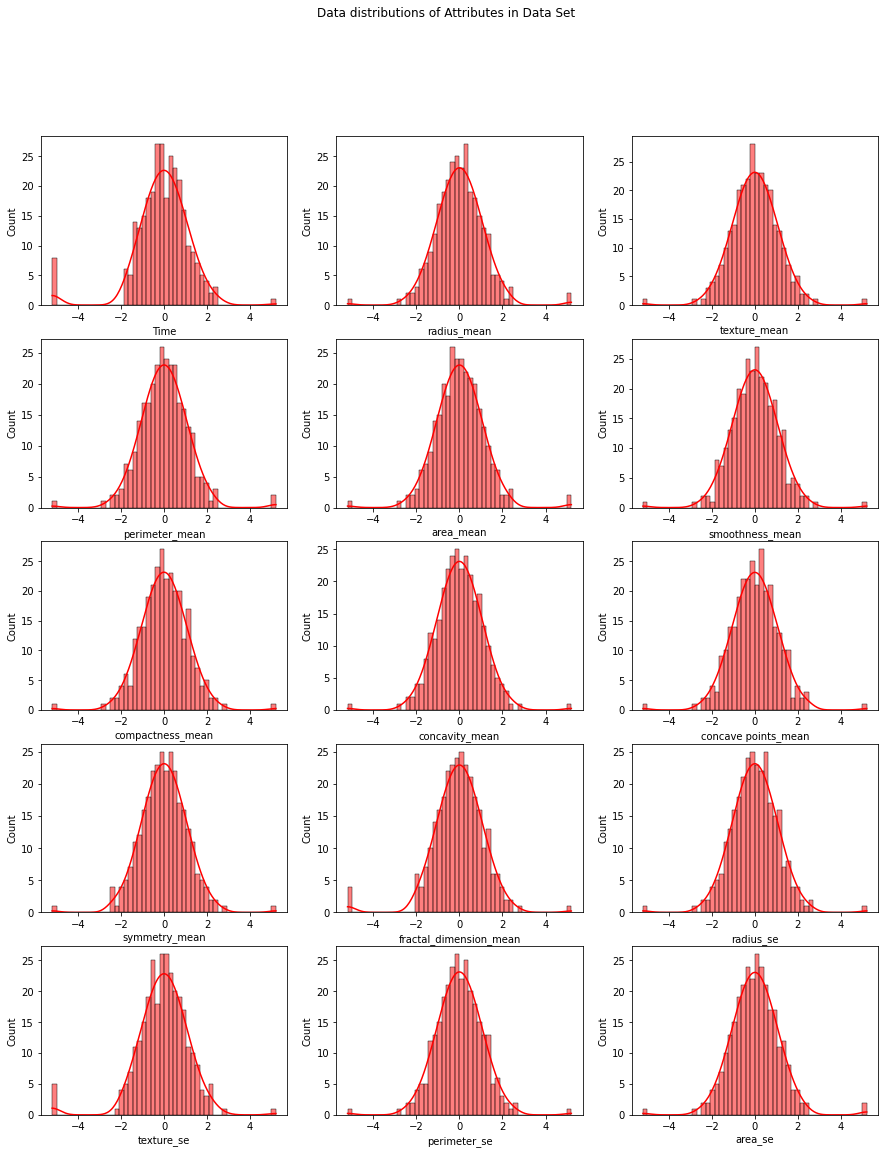

In [24]:
data_distribution(columns[0:15], bins = 50)

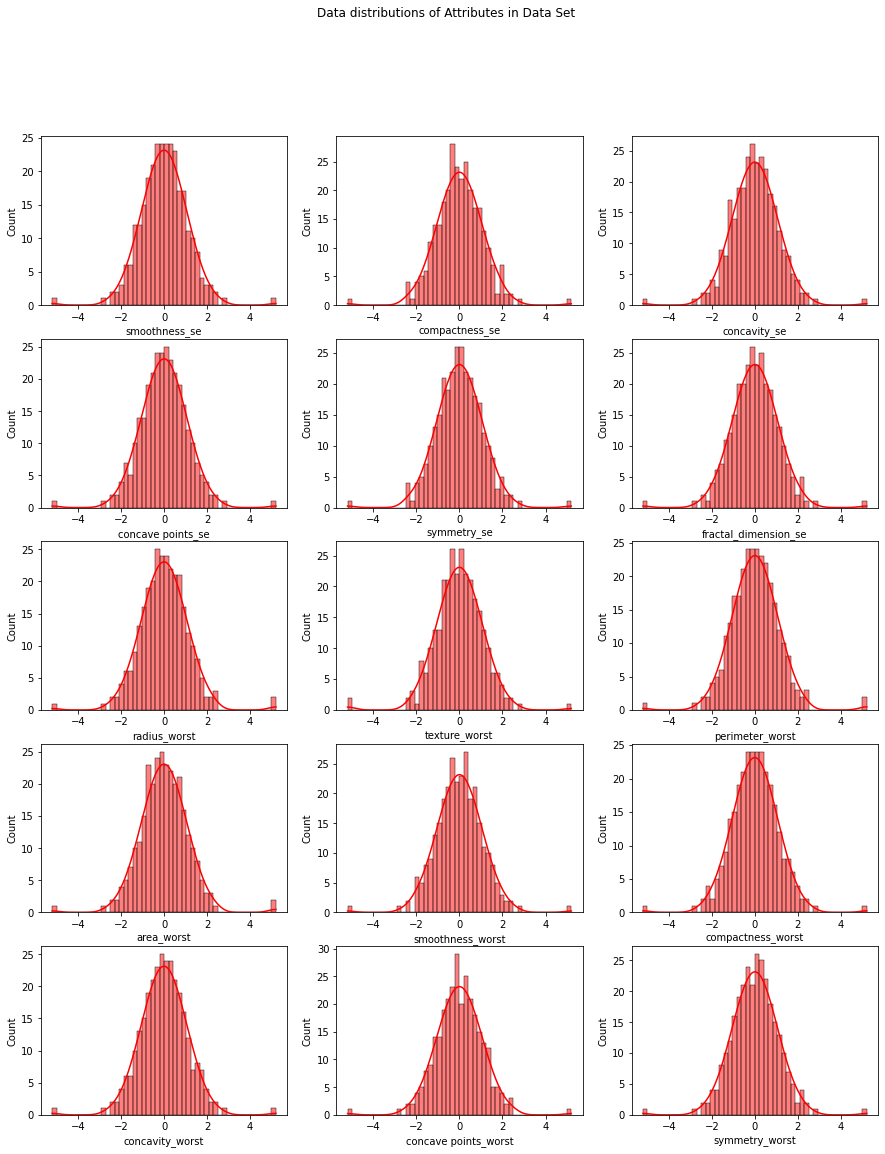

In [25]:
data_distribution(columns[15:30], bins = 50) 

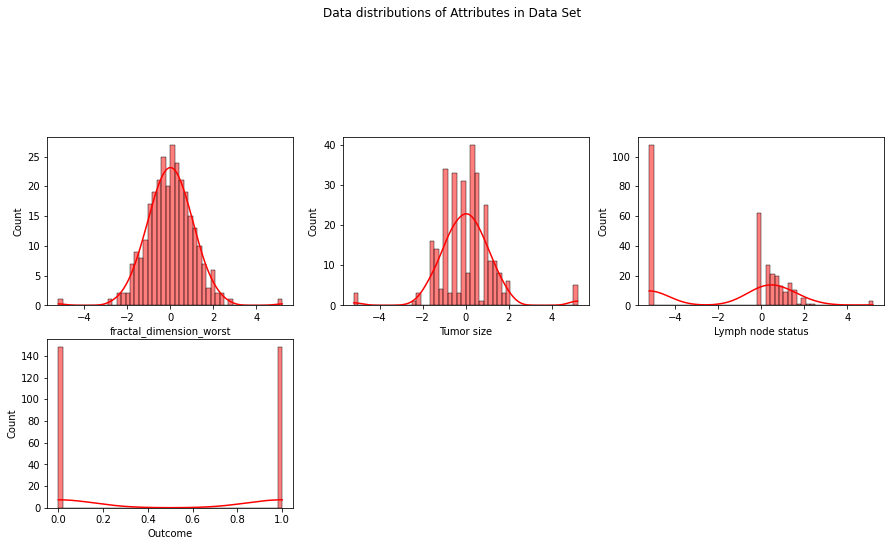

In [26]:
data_distribution(columns[30:], bins = 50) 

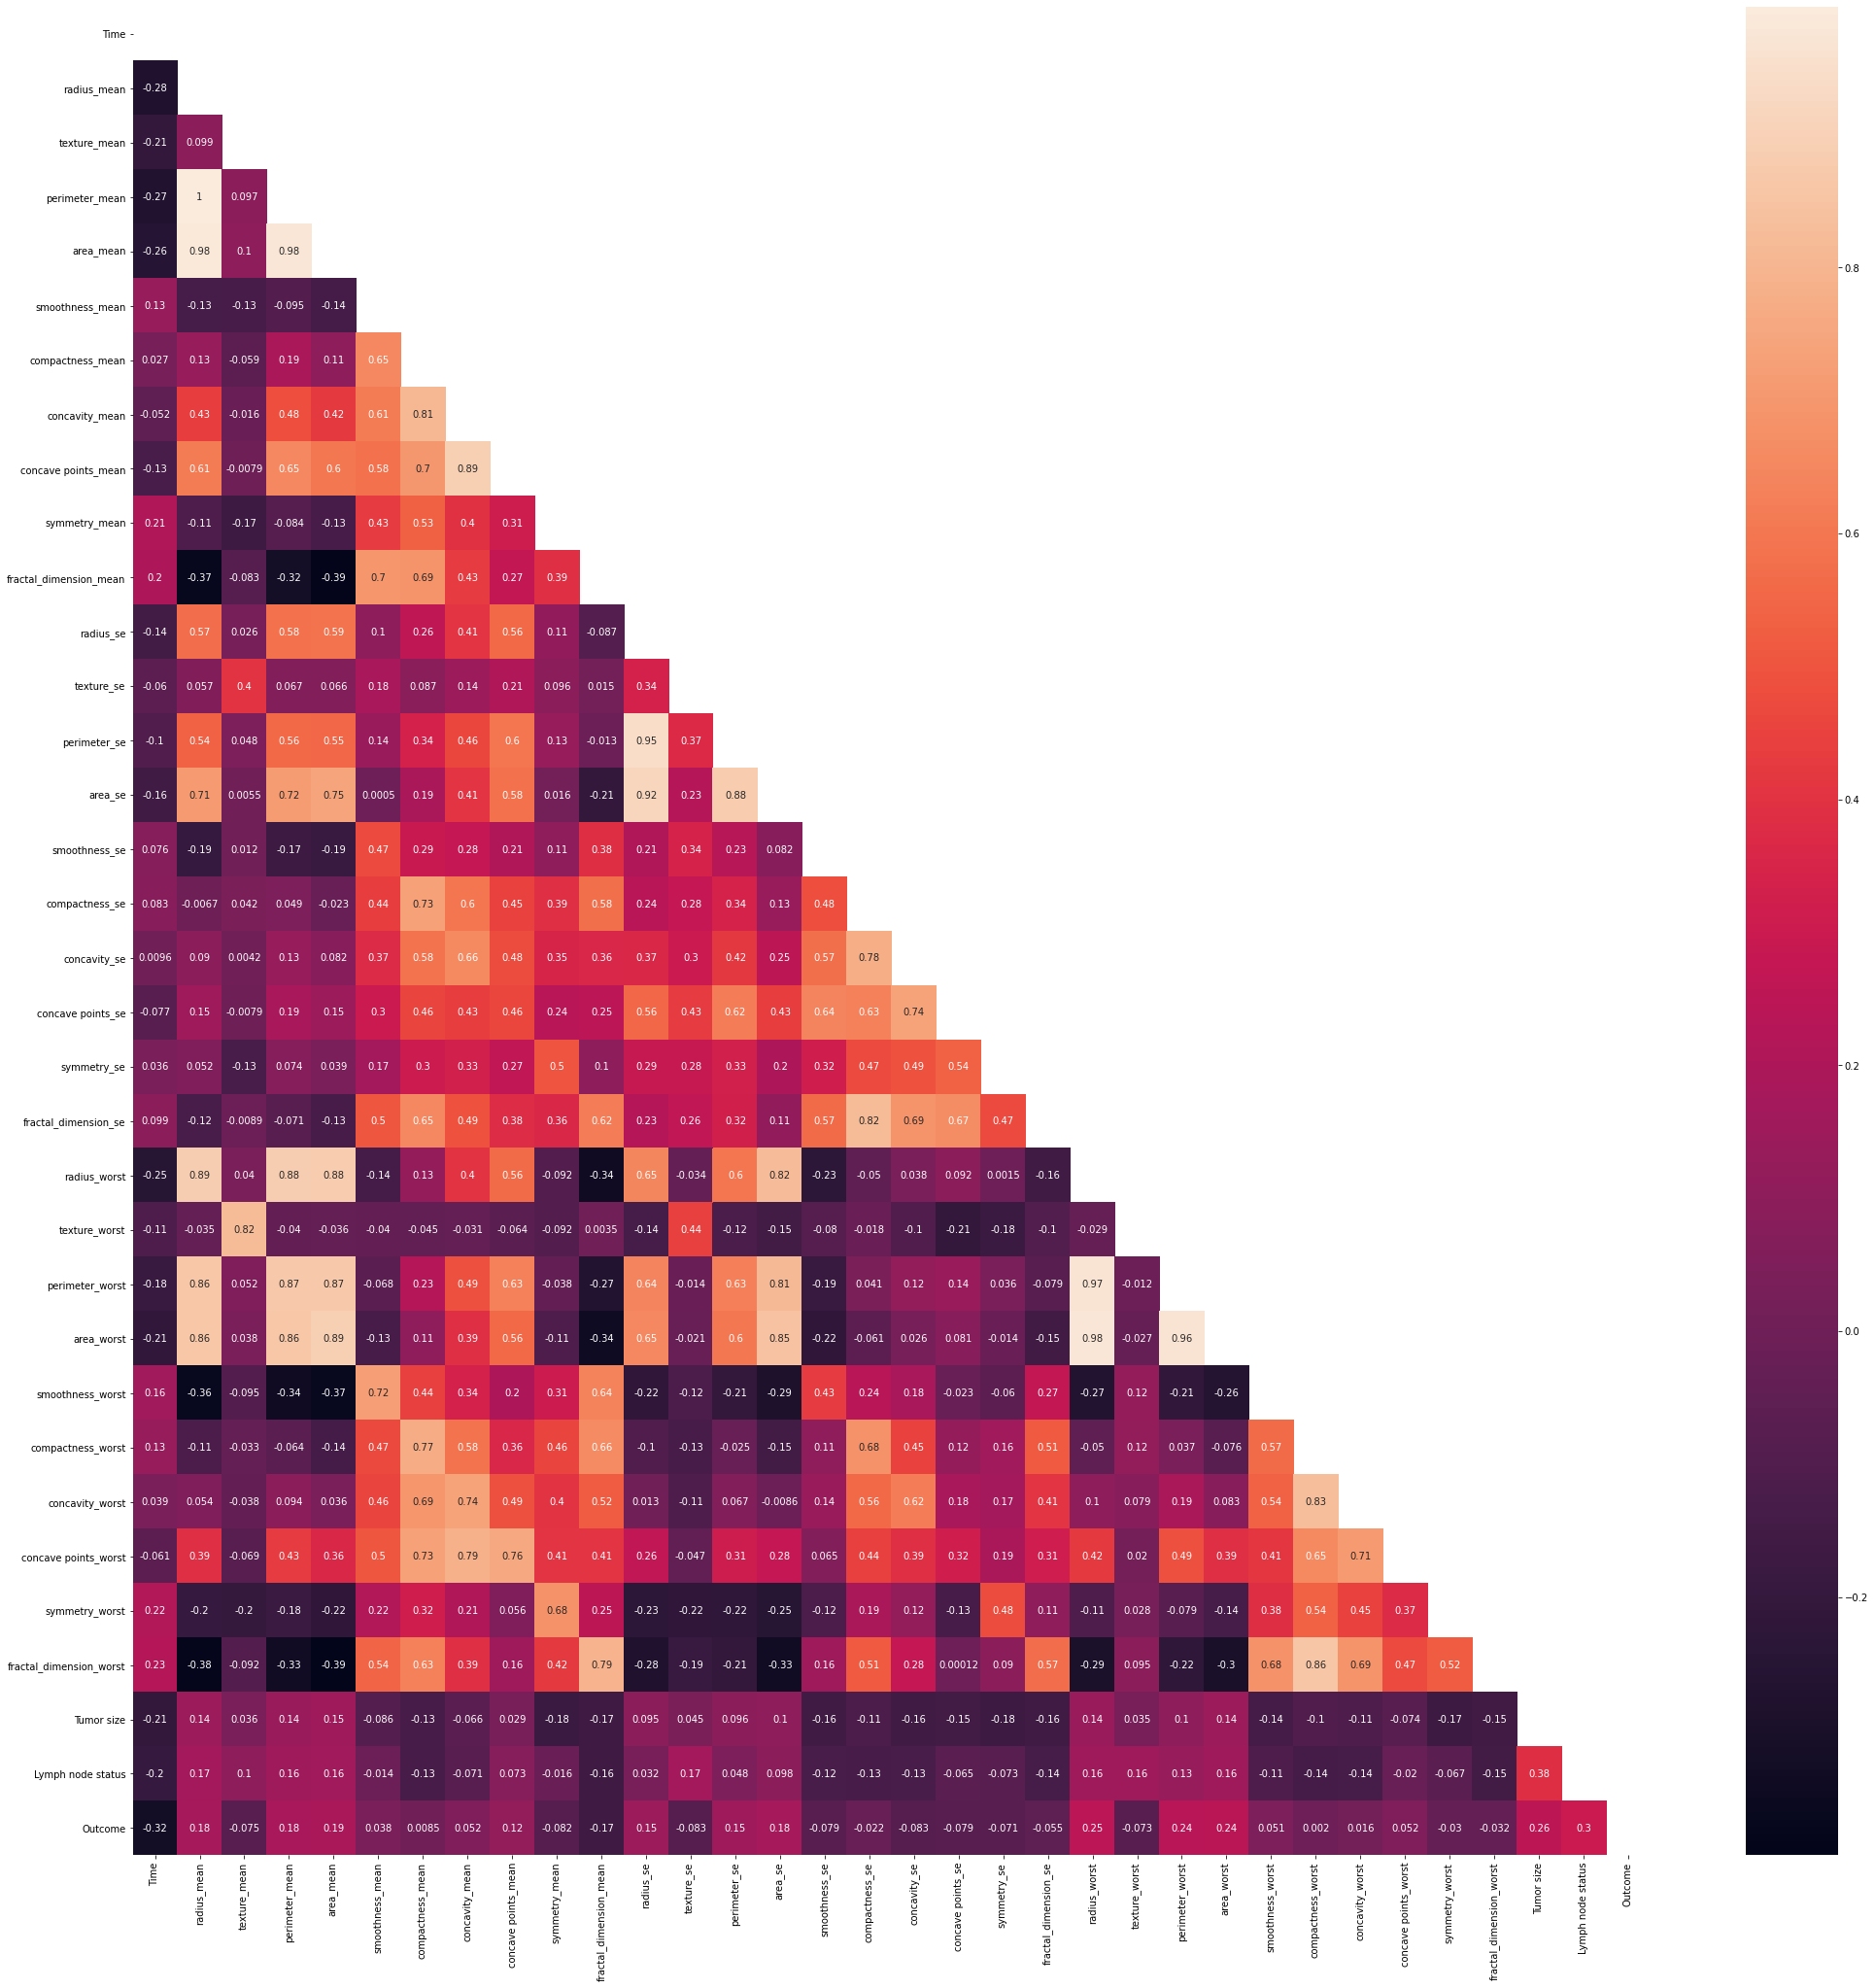

In [27]:
figure = plt.figure(figsize=(35,35))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=matrix)

In [28]:
X = df.iloc[:, 0:33].values
Y = df.iloc[:, 33].values

def classification_evaluation(classifier, X, Y, classifier_name, columns):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    accuracy_arr = np.zeros(shape=(1,10))
    f1_score_arr = np.zeros(shape=(1,10))
    precision_arr = np.zeros(shape=(1,10))
    recall_arr = np.zeros(shape=(1,10))
    feature_importance_arr = np.zeros(shape=(1,33))
    time_arr = []
    

    cv = StratifiedKFold(n_splits=10)
    fig, ax = plt.subplots(figsize=(15, 10))
    start_time = time.time()
    for i, (train, test) in enumerate(cv.split(X, Y)):
        itr_start_time = time.time()
        classifier.fit(X[train], Y[train])
        itr_end_time = time.time()
        viz = plot_roc_curve(classifier, X[test], Y[test],
                             name=f'ROC fold {i}',
                             alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        try:
            feature_importance_arr += classifier.feature_importances_
        except:
            try:
                feature_importance_arr += np.array([abs(i) for i in classifier.coef_[0]])
            except:
                feature_importance_arr += np.array([abs(i) for i in permutation_importance(classifier, X[test], Y[test]).importances_mean])
            
        
        predict = classifier.predict(X[test])
        accuracy = classifier.score(X[test], Y[test])
        accuracy_arr[0, i] = accuracy
        f1 = f1_score(predict, Y[test])
        f1_score_arr[0, i] = f1
        precision = precision_score(predict, Y[test])
        precision_arr[0, i] = precision
        recall = recall_score(predict, Y[test])
        recall_arr[0, i] = recall
        train, test = train, test
        time_arr.append(itr_end_time-itr_start_time)
        print(f"Fold-{i}:  accuracy: {accuracy}  f1-score: {f1}  precision: {precision}  recall: {recall}  time: {itr_end_time-itr_start_time}")
    end_time = time.time()
    
    print()
    print(f"Classification Report for {classifier_name}")
    print("Average Accuracy :", np.mean(accuracy_arr))
    print("Average F1-Score :", np.mean(f1_score_arr))
    print("Average Precision :", np.mean(precision_arr))
    print("Average Recall :", np.mean(recall_arr))
    print("Total Time :", end_time - start_time)
    
    fig = plt.figure(figsize=(15, 10))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=f"Receiver Operating Characteristic for {classifier_name}")
    ax.legend(loc="lower right")
    plt.show()
    
    feature_importance_arr /= 10
    
    fig = plt.figure(figsize=(15, 10))
    
    plt.subplot(1, 2, 1)
    feature_imp = pd.Series(feature_importance_arr[0], index = columns[:33])
    feature_imp.nlargest(10).plot(kind = 'bar')
    plt.title(f"Feature Importance of {classifier_name}")
    
    
    plt.subplot(1,2,2)
    plt.plot(time_arr, 'go-', color="darkblue")
    plt.plot([max(time_arr) for i in range(10)], color='lightcoral', label='UL')
    plt.plot([min(time_arr) for i in range(10)], color='lightgreen', label='LL')
    plt.title("Training time for every iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Time in sec.")
    plt.legend(loc="upper right")
    
    plt.show()
    
    return np.mean(accuracy_arr), np.mean(f1_score_arr), np.mean(precision_arr), np.mean(recall_arr), mean_auc

Fold-0:  accuracy: 0.8  f1-score: 0.7857142857142856  precision: 0.7333333333333333  recall: 0.8461538461538461  time: 0.06118130683898926
Fold-1:  accuracy: 0.7666666666666667  f1-score: 0.7586206896551724  precision: 0.7333333333333333  recall: 0.7857142857142857  time: 0.040390968322753906
Fold-2:  accuracy: 0.7  f1-score: 0.7096774193548386  precision: 0.7333333333333333  recall: 0.6875  time: 0.02954888343811035
Fold-3:  accuracy: 0.7666666666666667  f1-score: 0.8  precision: 0.9333333333333333  recall: 0.7  time: 0.031052589416503906
Fold-4:  accuracy: 0.7333333333333333  f1-score: 0.7500000000000001  precision: 0.8  recall: 0.7058823529411765  time: 0.03720831871032715
Fold-5:  accuracy: 0.7333333333333333  f1-score: 0.7500000000000001  precision: 0.8  recall: 0.7058823529411765  time: 0.040326595306396484
Fold-6:  accuracy: 0.6896551724137931  f1-score: 0.689655172413793  precision: 0.7142857142857143  recall: 0.6666666666666666  time: 0.034586191177368164
Fold-7:  accuracy: 0.

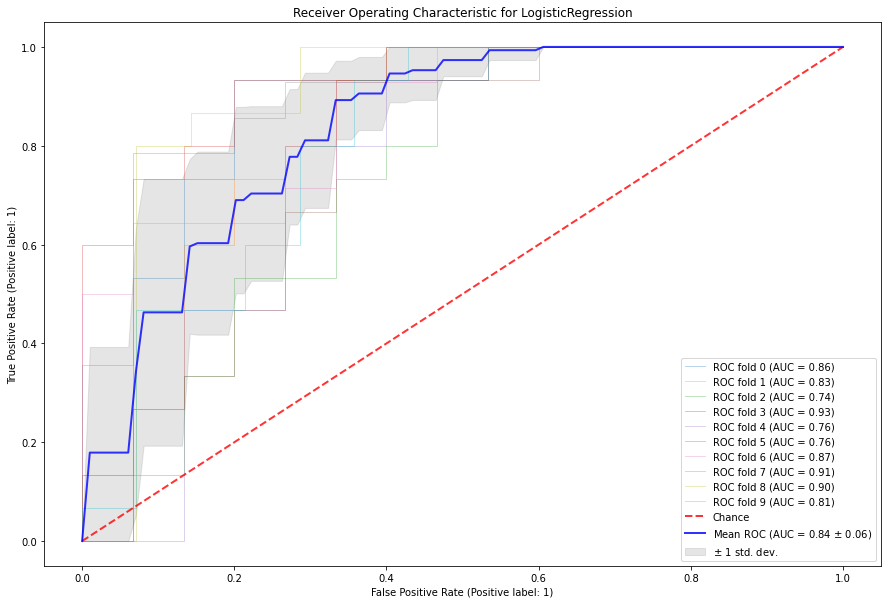

<Figure size 1080x720 with 0 Axes>

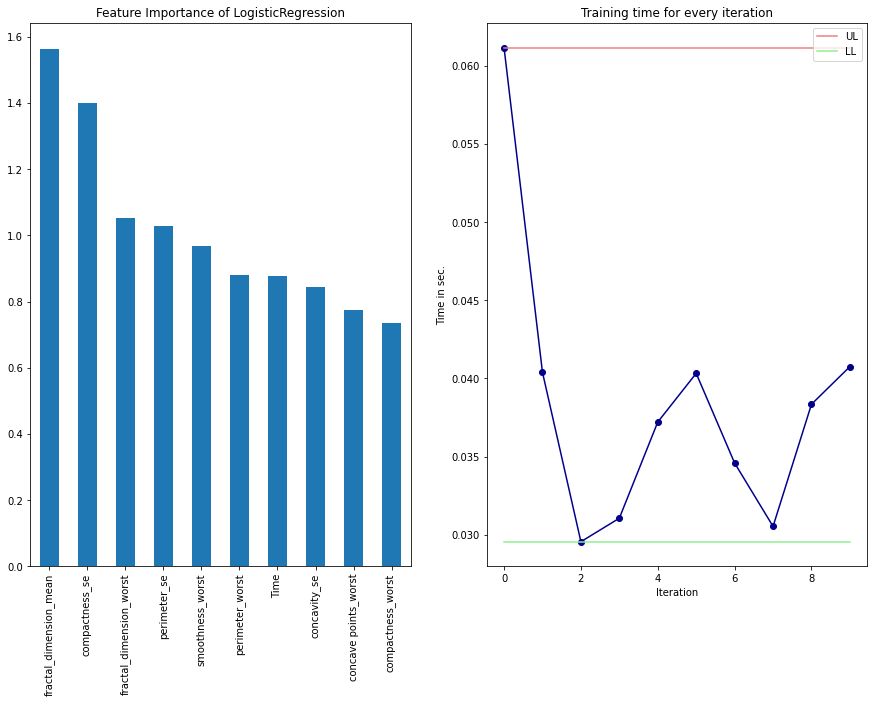

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
classifier = LogisticRegression()

lr_acc, lr_f1, lr_precision, lr_recall, lr_auc = classification_evaluation(classifier, X, Y, "LogisticRegression", columns)

Fold-0:  accuracy: 0.9666666666666667  f1-score: 0.967741935483871  precision: 1.0  recall: 0.9375  time: 0.14006686210632324
Fold-1:  accuracy: 0.9666666666666667  f1-score: 0.9655172413793104  precision: 0.9333333333333333  recall: 1.0  time: 0.14179563522338867
Fold-2:  accuracy: 0.9666666666666667  f1-score: 0.9655172413793104  precision: 0.9333333333333333  recall: 1.0  time: 0.18746566772460938
Fold-3:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.12964272499084473
Fold-4:  accuracy: 0.9666666666666667  f1-score: 0.967741935483871  precision: 1.0  recall: 0.9375  time: 0.1812584400177002
Fold-5:  accuracy: 0.9666666666666667  f1-score: 0.967741935483871  precision: 1.0  recall: 0.9375  time: 0.13956475257873535
Fold-6:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.13724732398986816
Fold-7:  accuracy: 0.8620689655172413  f1-score: 0.8750000000000001  precision: 1.0  recall: 0.7777777777777778  time: 0.15528130531311035
Fold-8:  accuracy:

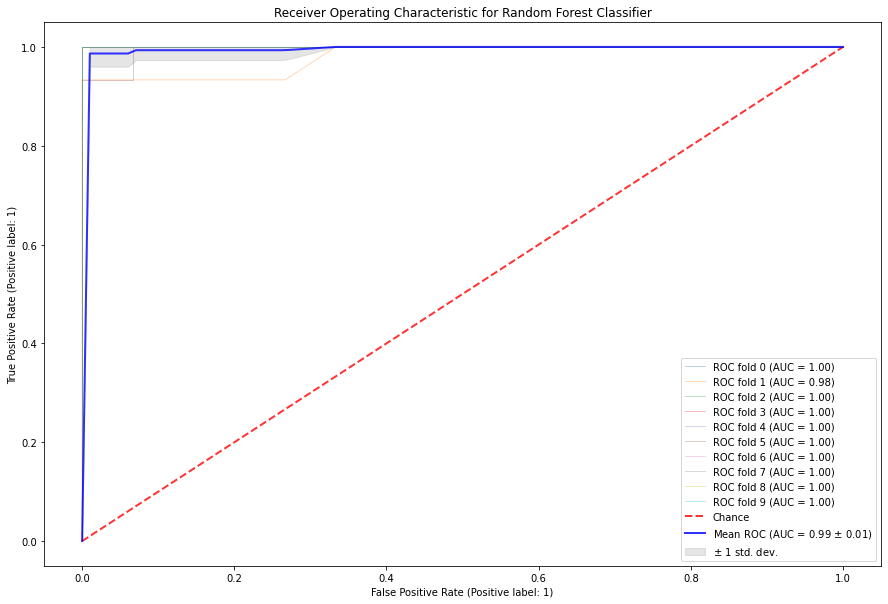

<Figure size 1080x720 with 0 Axes>

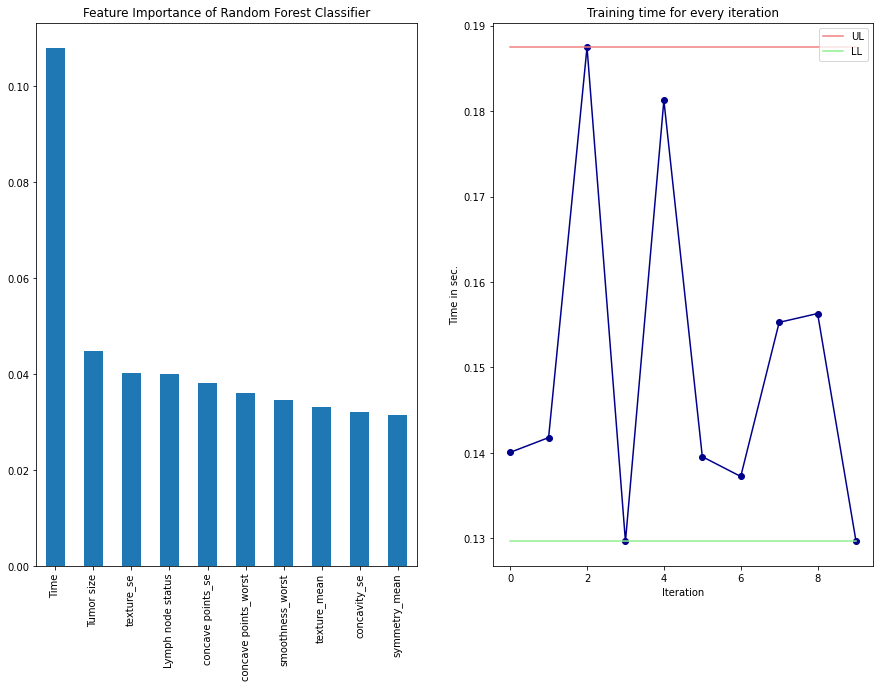

In [34]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
rf_acc, rf_f1, rf_precision, rf_recall, rf_auc = classification_evaluation(classifier, X, Y, "Random Forest Classifier", list(df.columns))

Fold-0:  accuracy: 0.7666666666666667  f1-score: 0.7200000000000001  precision: 0.6  recall: 0.9  time: 0.0
Fold-1:  accuracy: 0.8  f1-score: 0.8125  precision: 0.8666666666666667  recall: 0.7647058823529411  time: 0.0
Fold-2:  accuracy: 0.5333333333333333  f1-score: 0.6315789473684211  precision: 0.8  recall: 0.5217391304347826  time: 0.005742788314819336
Fold-3:  accuracy: 0.5333333333333333  f1-score: 0.6315789473684211  precision: 0.8  recall: 0.5217391304347826  time: 0.005081653594970703
Fold-4:  accuracy: 0.5333333333333333  f1-score: 0.5333333333333333  precision: 0.5333333333333333  recall: 0.5333333333333333  time: 0.0
Fold-5:  accuracy: 0.6  f1-score: 0.6666666666666666  precision: 0.8  recall: 0.5714285714285714  time: 0.0
Fold-6:  accuracy: 0.6551724137931034  f1-score: 0.6428571428571429  precision: 0.6428571428571429  recall: 0.6428571428571429  time: 0.0021915435791015625
Fold-7:  accuracy: 0.6551724137931034  f1-score: 0.6875000000000001  precision: 0.7857142857142857 

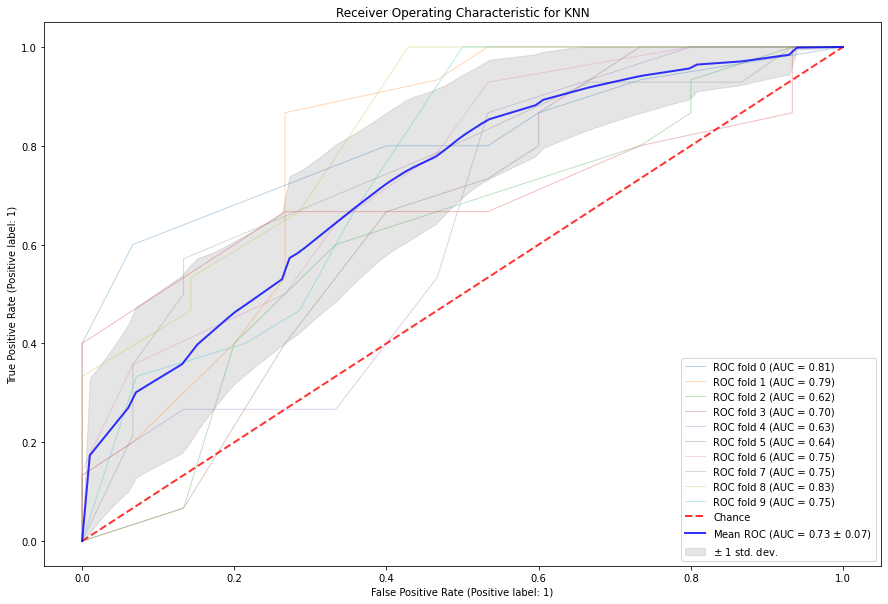

<Figure size 1080x720 with 0 Axes>

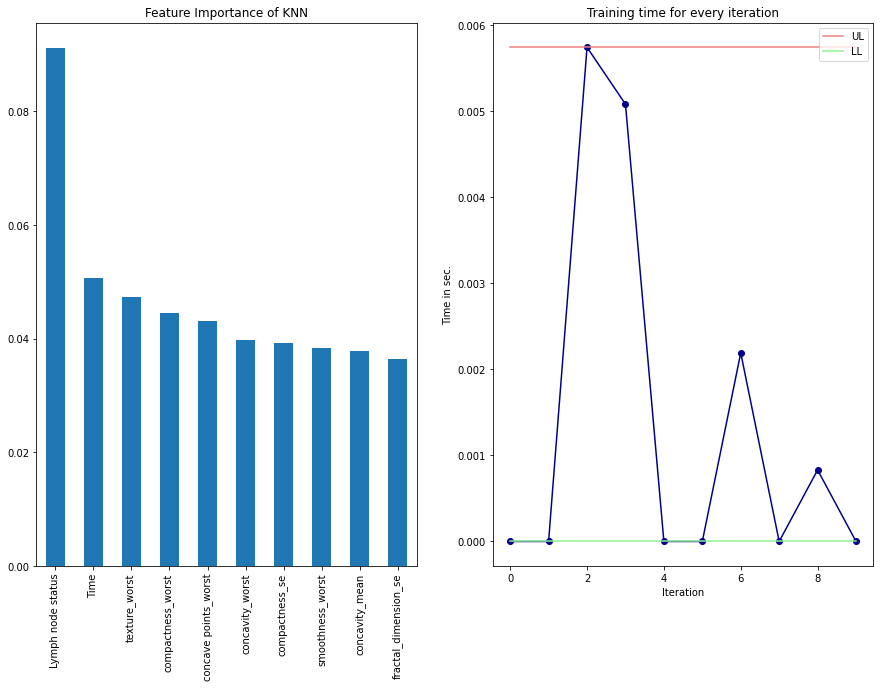

In [31]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10)
kf_acc, kf_f1, kf_precision, kf_recall, kf_auc = classification_evaluation(classifier, X, Y, "KNN", list(df.columns))

Fold-0:  accuracy: 0.9666666666666667  f1-score: 0.967741935483871  precision: 1.0  recall: 0.9375  time: 0.06622791290283203
Fold-1:  accuracy: 0.9666666666666667  f1-score: 0.9655172413793104  precision: 0.9333333333333333  recall: 1.0  time: 0.06471729278564453
Fold-2:  accuracy: 1.0  f1-score: 1.0  precision: 1.0  recall: 1.0  time: 0.06249427795410156
Fold-3:  accuracy: 0.9666666666666667  f1-score: 0.967741935483871  precision: 1.0  recall: 0.9375  time: 0.0743403434753418
Fold-4:  accuracy: 0.8333333333333334  f1-score: 0.8571428571428571  precision: 1.0  recall: 0.75  time: 0.06882405281066895
Fold-5:  accuracy: 0.9333333333333333  f1-score: 0.9375  precision: 1.0  recall: 0.8823529411764706  time: 0.08184456825256348
Fold-6:  accuracy: 0.9310344827586207  f1-score: 0.9333333333333333  precision: 1.0  recall: 0.875  time: 0.09597492218017578
Fold-7:  accuracy: 0.7586206896551724  f1-score: 0.8  precision: 1.0  recall: 0.6666666666666666  time: 0.07987236976623535
Fold-8:  accur

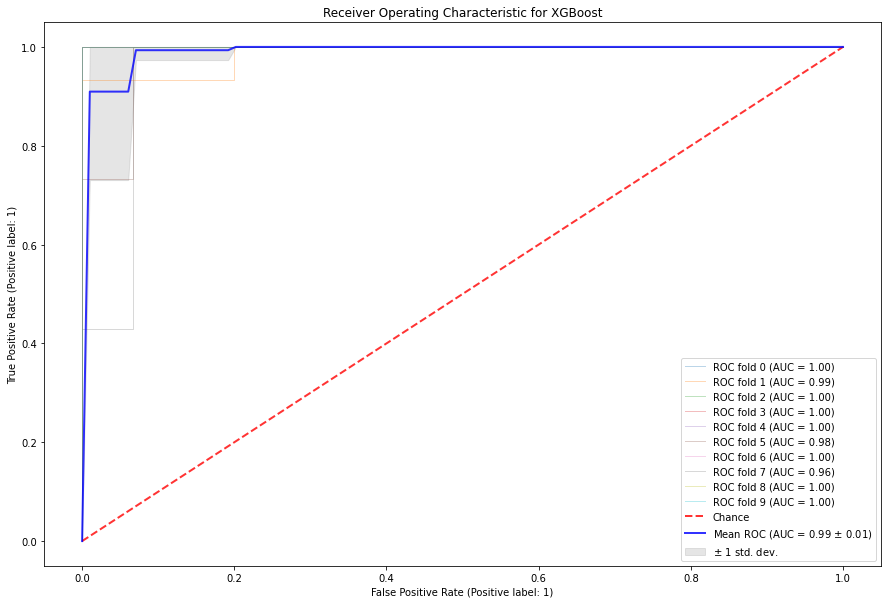

<Figure size 1080x720 with 0 Axes>

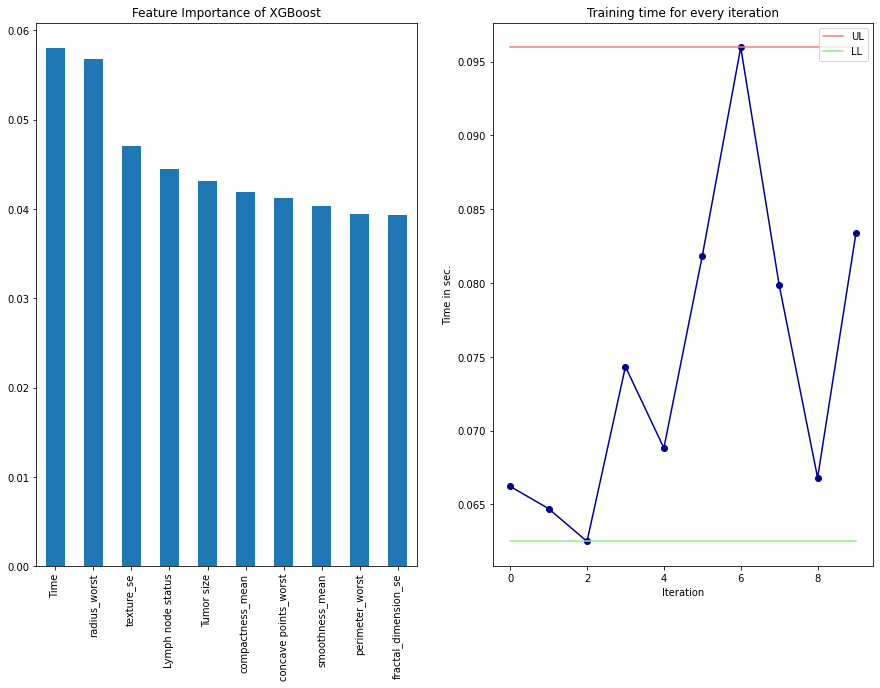

In [36]:
from xgboost import XGBClassifier

classifier = XGBClassifier(n_estimators=120)
xg_acc, xg_f1, xg_precision, xg_recall, xg_auc = classification_evaluation(classifier, X, Y, "XGBoost", list(df.columns))

Fold-0:  accuracy: 0.5333333333333333  f1-score: 0.4615384615384615  precision: 0.4  recall: 0.5454545454545454  time: 0.0
Fold-1:  accuracy: 0.6666666666666666  f1-score: 0.6666666666666666  precision: 0.6666666666666666  recall: 0.6666666666666666  time: 0.0
Fold-2:  accuracy: 0.7666666666666667  f1-score: 0.7878787878787877  precision: 0.8666666666666667  recall: 0.7222222222222222  time: 0.0
Fold-3:  accuracy: 0.6666666666666666  f1-score: 0.7058823529411765  precision: 0.8  recall: 0.631578947368421  time: 0.0
Fold-4:  accuracy: 0.5666666666666667  f1-score: 0.606060606060606  precision: 0.6666666666666666  recall: 0.5555555555555556  time: 0.0
Fold-5:  accuracy: 0.5666666666666667  f1-score: 0.6285714285714286  precision: 0.7333333333333333  recall: 0.55  time: 0.0
Fold-6:  accuracy: 0.5172413793103449  f1-score: 0.5333333333333333  precision: 0.5714285714285714  recall: 0.5  time: 0.0
Fold-7:  accuracy: 0.4482758620689655  f1-score: 0.4666666666666667  precision: 0.5  recall: 0.

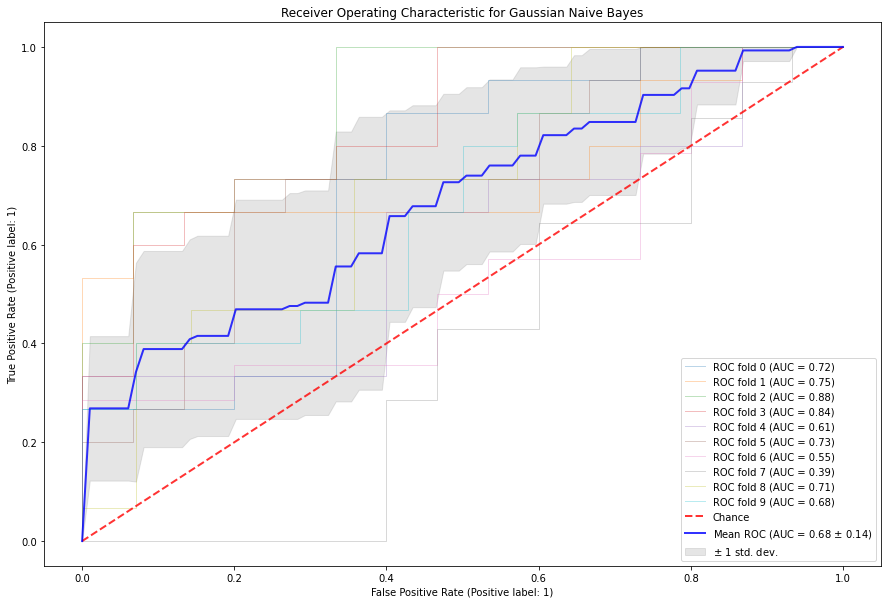

<Figure size 1080x720 with 0 Axes>

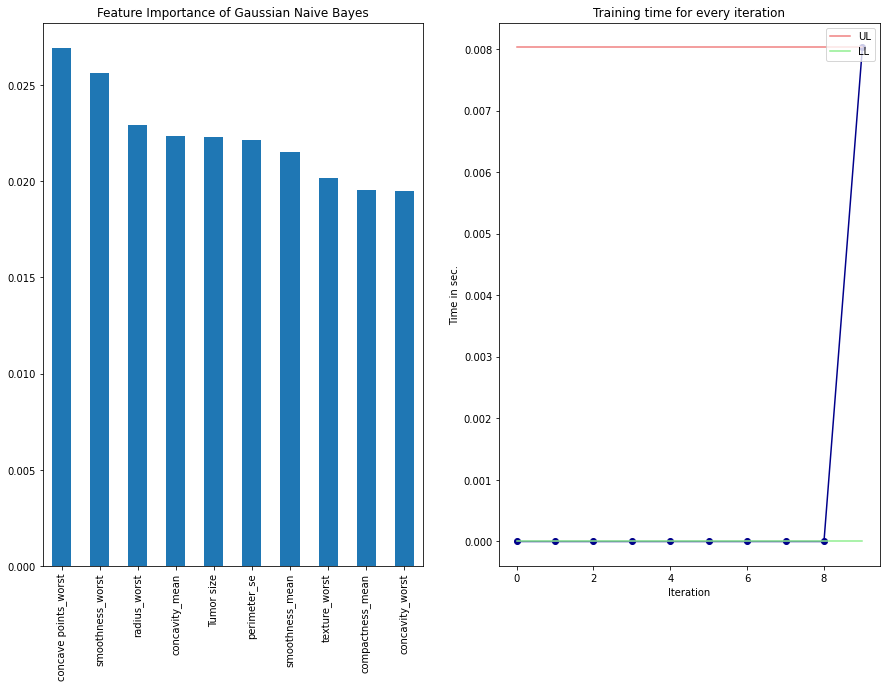

In [37]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
gn_acc, gn_f1, gn_precision, gn_recall, gn_auc = classification_evaluation(classifier, X, Y, "Gaussian Naive Bayes", list(df.columns))